In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.linear import (
    LinearRegression,
)

In [3]:
np.random.seed(1234)

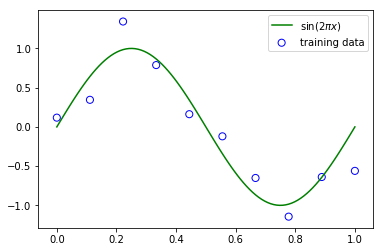

In [4]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

train_sz = 10
test_sz = 100
std_error = 0.25
x_train, y_train = create_toy_data(func, train_sz, std_error)
x_test, y_test = create_toy_data(func, test_sz, std_error)
y_true = func(x_test)

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

Model 0 [-0.03592087]
Model 1 [ 0.78301942 -1.63788059]
Model 3 [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
Model 9 [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]


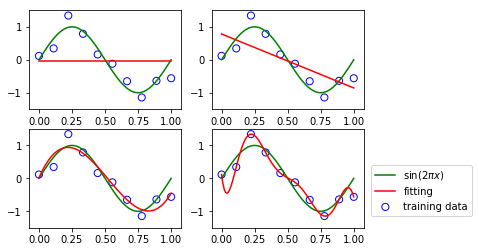

In [5]:
from sklearn.preprocessing import PolynomialFeatures

for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeatures(degree)
    X_train = feature.fit_transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f'Model {degree} {model.coef_}')
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_true, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()